In [17]:
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
import math
import plotly as pl

In [3]:
####	Get raw data ## Load in each file

column_names = ['X1', 'ID', 'Case Number' ,'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward',

'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


df = pd.read_csv('Crimes_2001_to_present_sample.csv', encoding='utf-8', names=column_names, skiprows=1,low_memory=False)

#df=pd.read_csv('Crimes_2001_to_present_sample.csv')

In [4]:
df.head()

,X1,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"


In [5]:
####	Format data ## Remove columns

#df = df.drop(['X1', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Location'], axis=1) ## Rename columns

df = df.rename(columns={"Date": "Datetime"})




### Change data types

##	Change data type for ID
def trim_fraction(text):

    if '.0' in text:

        return text[:text.rfind('.0')]
    return text

df['ID'] = df['ID'].astype('str') 
df.ID = df.ID.apply(trim_fraction)


In [6]:
##	Change data types for all columns

df['Case Number'] = df['Case Number'].astype(str)

df['Datetime'] = df['Datetime'].astype(str)

df['Block'] = df['Block'].astype(str)

df['Primary Type'] = df['Primary Type'].astype(str)

df['Description'] = df['Description'].astype(str)

df['Location Description'] = df['Location Description'].astype(str)

df['Arrest'] = df['Arrest'].astype(str)

In [7]:
df['Domestic'] = df['Domestic'].astype(str)

df['Beat'] = pd.to_numeric(df['Beat'], errors='coerce')

df['District'] = pd.to_numeric(df['District'], errors='coerce')

df['Ward'] = pd.to_numeric(df['Ward'], errors='coerce')

df['Community Area'] = pd.to_numeric(df['Community Area'], errors='coerce')

df['FBI Code'] = df['FBI Code'].astype(str)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df['Updated On'] = df['Updated On'].astype(str)

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


In [8]:
### Create datetimes

df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce') # Will not work without coerce... R does this automatically

df['Updated On'] = pd.to_datetime(df['Updated On'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')


#### Create columns

###	Create columns from datetime ## Month name

df['Month'] = df['Datetime'].dt.strftime('%B') ## Month

df['Month Value'] = df['Datetime'].dt.month ## Year Month

df['Year Month'] = df['Datetime'].dt.strftime('%Y-%m') ## Hour

df['Hour'] = df['Datetime'].dt.hour


In [9]:
####	Create unique identifier ## Create unique identifier

df['Identifier'] = df['ID'] + '-' + df['Case Number'] ## Remove duplicates

df = df.sort_values(['Updated On'], ascending=False)
df = df.drop_duplicates('Identifier')
 

#### Crime rate per month per District


In [11]:
## Get crime counts for each Primary Type

dfDistrict = df.groupby(['Year Month', 'District', 'Primary Type']).size().reset_index()

dfDistrict = dfDistrict.rename(columns={0:'Numerator'})

dfDistrict['ID'] = dfDistrict['Year Month'] + ' ' + dfDistrict['District'].astype(str)

In [12]:
## Get crime counts for each month

dfMonth = df.groupby(['Year Month', 'District']).size().reset_index()

dfMonth = dfMonth.rename(columns={0:'Denominator'})

dfMonth['ID'] = dfMonth['Year Month'] + ' ' + dfMonth['District'].astype(str)

dfMonth = dfMonth[['ID', 'Denominator']]

In [13]:
##	Join to get numerator and denominator together 
dfJoin = pd.merge(dfDistrict, dfMonth, how='left')

dfJoin['Crime Rate'] = dfJoin['Numerator']/dfJoin['Denominator'] * 100


#### Visualisation


## Prepare data frame for Theft from 2016

dfPrimaryType = dfJoin[(dfJoin['Primary Type'] == "THEFT")].reset_index()
dfPrimaryType = dfPrimaryType[(dfPrimaryType['Year Month'] > "2015-12")]

# Plots

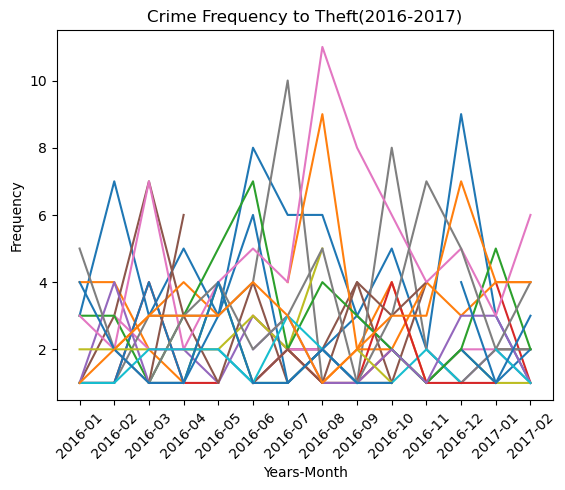

In [14]:
## Crime frequency - theft

dfCrimeFreq = dfPrimaryType.pivot(index='Year Month', columns='District')['Numerator']

dfCrimeFreq = dfCrimeFreq.reset_index()

x = list(range(dfCrimeFreq.shape[0]))

y = dfCrimeFreq.drop(['Year Month'], axis=1)

plt.plot(x, y)

xticks = dfCrimeFreq['Year Month']

plt.xticks(x, xticks, rotation=45)

plt.title('Crime Frequency to Theft(2016-2017)')

plt.xlabel('Years-Month')

 
plt.ylabel('Frequency')

plt.show()

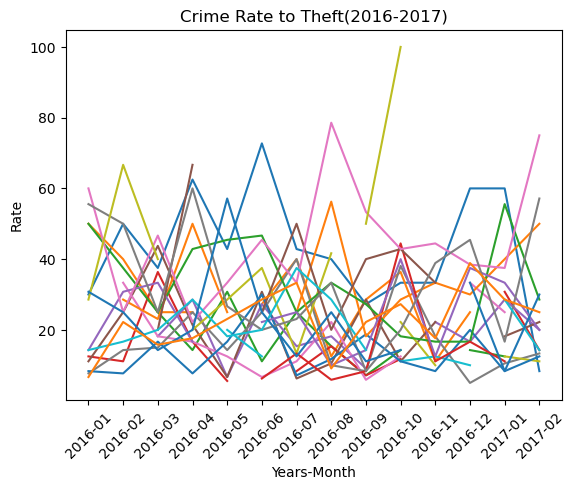

In [22]:
## Crime rate - theft

dfCrimeRate = dfPrimaryType.pivot(index='Year Month', columns='District')['Crime Rate']

dfCrimeRate = dfCrimeRate.reset_index()

x = list(range(dfCrimeRate.shape[0]))

y = dfCrimeRate.drop(['Year Month'], axis=1)

plt.plot(x, y)

xticks = dfCrimeRate['Year Month']

plt.xticks(x, xticks, rotation=45)

plt.title('Crime Rate to Theft(2016-2017)')

plt.xlabel('Years-Month')

plt.ylabel('Rate')

plt.show()




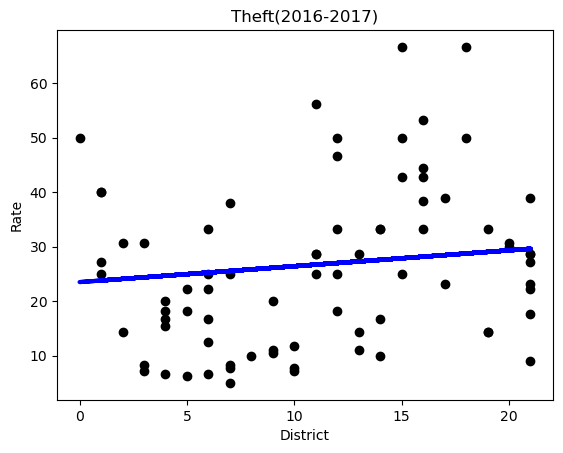

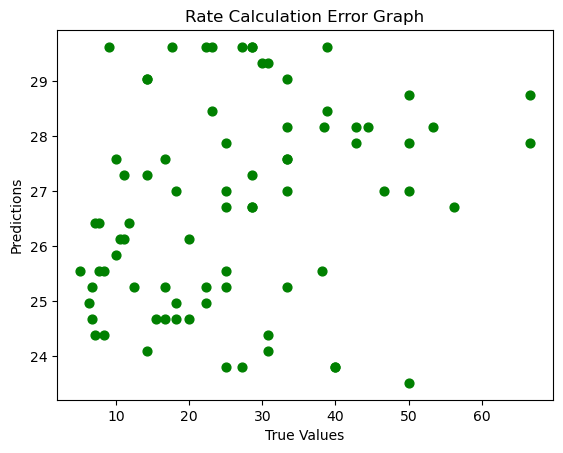

In [21]:
xx, yy = [], []

for i in range(y.shape[0]):  # Iterate through rows
    for j in range(y.shape[1]):  # Iterate through columns
        if not np.isnan(y.iloc[i, j]):
            yy.append(y.iloc[i, j])
            xx.append(j)

x1 = np.asarray(xx)
x1.shape = (x1.size, 1)
y1 = np.asarray(yy)

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=42)

# fit model
lm = LinearRegression()
lm.fit(x_train, y_train)

# predict
y_pred = lm.predict(x_test)
pred_train = lm.predict(x_train)

# plot district vs rate
plt.scatter(x_test, y_test, color='black') 
plt.plot(x_test, y_pred, color='blue', linewidth=3) 
plt.title('Theft(2016-2017)') 
plt.xlabel('District')
plt.ylabel('Rate')
plt.show()

# plot rate variance
plt.scatter(y_test, y_pred, c='g', s=40) 
plt.title('Rate Calculation Error Graph')
plt.xlabel('True Values') 
plt.ylabel('Predictions')
plt.show()
